<a href="https://colab.research.google.com/github/JosenildoJunior/StatPyDataScience/blob/main/Fundamentos_Teste_de_Hip%C3%B3tese.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Fundamentos para os testes de hipóteses**

Um teste de hipótese é uma ferramenta estatística que permite determinar se há evidências suficientes para rejeitar uma afirmação sobre uma população. Essa afirmação é chamada de hipótese nula (H0).

**Estrutura:**

- Hipótese nula (H0): Afirmação que queremos testar.
- Hipótese alternativa (H1): Afirmação que será aceita se a H0 for rejeitada.

## **Amostra e População**

### **População**

População é o conjunto completo de dados que você deseja estudar.

Vamos importar a nossa população que nesse caso será a nossa base de dados, mas antes vamos importar as bibliotecas necessarias

In [21]:
# Acesso ao drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
# Manipulação de dados
import pandas as pd

# Algébra linear
import numpy as np

# Visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

# Funções aleatórias
import random

# Funções estatísticas
import statistics
import scipy.stats

Importaremos a nossa população, que neste caso será a nossa base de dados. Antes disso, importaremos as bibliotecas necessárias.

In [23]:
# Importando o dataset
populacao = pd.read_csv('/content/drive/MyDrive/Estatística para ciência de dados/house_price.csv')

Observemos agora as dimensões da nossa população.

In [24]:
# Observando a dimensão dos dados
populacao.shape

(1460, 12)

Agora que já entendemos as dimensões da nossa população, vamos observar os primeiros registros.

In [25]:
# Observando os registros
populacao.head()

,Unnamed: 0,SalePrice,OverallQual,OverallCond,BedroomAbvGr,TotRmsAbvGrd,GrLivArea,TotalBsmtSF,YearBuilt,MSZoning,Utilities,BldgType
0,0,208500,7,5,3,8,1710,856,2003,RL,AllPub,1Fam
1,1,181500,6,8,3,6,1262,1262,1976,RL,AllPub,1Fam
2,2,223500,7,5,3,6,1786,920,2001,RL,AllPub,1Fam
3,3,140000,7,5,3,7,1717,756,1915,RL,AllPub,1Fam
4,4,250000,8,5,4,9,2198,1145,2000,RL,AllPub,1Fam


Dessa forma, podemos entender que a população nada mais é que um conjunto completo de elementos ou dados.

### **Amostra**

Amostra é um subconjunto da população que você coleta para fazer inferências sobre a população como um todo.

Agora que já temos a nossa população, vamos realizar uma amostragem aleatória simples.

#### **Amostragem Aleatória Simples**

A amostragem aleatória simples é um método de amostragem em que cada indivíduo da população tem a mesma chance de ser selecionado.

**Vantagens da Amostragem Aleatória Simples:**

- Representatividade: A amostragem aleatória simples tende a representar de forma justa a diversidade da população.

- Simplicidade: É fácil de entender e implementar, não requer conhecimento prévio sobre a população.

- Redução de Viés: Minimiza o risco de viés na seleção da amostra, pois cada elemento tem a mesma chance de ser escolhido.

**Desvantagens da Amostragem Aleatória Simples:**

- Ineficiência em Populações Pequenas: Em populações pequenas, pode não ser tão eficaz, pois a probabilidade de seleção pode resultar em amostras não tão representativas.

- Dificuldade com Elementos Raros: Pode ter dificuldade em capturar elementos raros se a amostra não for grande o suficiente.

Agora que já entendemos um pouco do conceito, seus prós e contras, vamos observar como é a aplicabilidade dessa amostragem.

In [6]:
# Selecionar uma amostra aleatória simples de tamanho 1000
amostragem_simples = populacao.sample(438)

Dessa forma, selecionamos aleatoriamente 438 indivíduos dessa base de dados. Como utilizamos a amostragem simples, todos os indivíduos tiveram a mesma chance de serem escolhidos. Vamos observar as dimensões dessa amostra.

In [7]:
# Observando as dimenções
amostragem_simples.shape

(438, 12)

Aqui podemos confirmar que a nossa amostragem foi um sucesso. Vamos observar rapidamente os primeiros registros presentes na amostra.

In [8]:
# Observando os primeiros registros
amostragem_simples.head()

,Unnamed: 0,SalePrice,OverallQual,OverallCond,BedroomAbvGr,TotRmsAbvGrd,GrLivArea,TotalBsmtSF,YearBuilt,MSZoning,Utilities,BldgType
414,414,228000,7,5,3,9,2097,1080,1993,RL,AllPub,1Fam
1224,1224,184000,7,5,3,8,1490,788,2004,RL,AllPub,1Fam
814,814,116000,5,7,3,7,1250,686,1918,RL,AllPub,1Fam
217,217,107000,4,4,3,8,1328,686,1925,RM,AllPub,1Fam
1317,1317,208900,7,5,2,5,1352,1352,2006,FV,AllPub,TwnhsE


#### **Amostragem Estratificada**

A amostragem estratificada é um método de amostragem em que a população é dividida em subgrupos (estratos) e, em seguida, uma amostra aleatória é selecionada de cada estrato.



**Vantagens da Amostragem Estratificada:**

- Representatividade Aprimorada: Garante que subgrupos importantes da população sejam representados proporcionalmente na amostra.

- Precisão Estatística: Reduz a variabilidade e aumenta a precisão das estimativas, especialmente quando há diferenças significativas entre estratos.

- Eficiência em Subpopulações: É eficaz em populações heterogêneas, onde a variabilidade interna é alta.

**Desvantagens da Amostragem Estratificada:**

- Complexidade na Implementação: Pode ser mais complexa de administrar e requer conhecimento prévio sobre a população para identificar estratos apropriados.

- Possíveis Dificuldades na Classificação: Determinar corretamente a estratificação pode ser desafiador, e classificar os elementos em estratos pode
envolver subjetividade.


Para nos auxiliar com esse tipo de amostragem, vamos importar uma biblioteca.

In [26]:
# Importando a biblioteca para realizar a 'estratificação'
from sklearn.model_selection import StratifiedShuffleSplit

Agora, antes de aplicarmos essa técnica propriamente dita, vamos imaginar como queremos realizar a separação dos grupos, que são os estratos.

Vamos criar grupos com base no "SalePrice". Para isso, vamos observar as medidas referentes a essa coluna.

In [27]:
# Calculando a média
media_sale = populacao['SalePrice'].mean()

# Calculando a mediana
mediana_sale = populacao['SalePrice'].median()

# Exibindo os valores
print(f" Média: {media_sale}\n Mediana: {mediana_sale}")

 Média: 180921.19589041095
 Mediana: 163000.0


Existe uma diferença entre a média e a mediana. Vamos observar um boxplot dessa coluna para observar a presença de outliers.

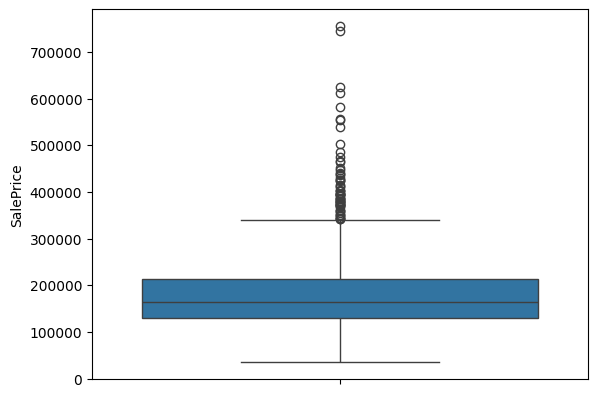

In [28]:
# Observando o boxplot
sns.boxplot(populacao['SalePrice']);

Aqui podemos confirmar que a presença de outliers está estiçando a média dessa variável. Porém, é possível que essas casas mais caras tenham características interessantes para a nossa amostragem. Então, nesse caso, utilizaremos a média.

A ideia é criar uma variável categórica onde, para os valores de venda acima da média, será atribuído o valor > 180k. Quando isso não ocorrer, o valor será < 180k. Dito isso, podemos seguir adiante.

In [29]:
# Criando a variável categórica com base na condição
populacao['Cat_price'] = np.where(populacao['SalePrice'] > media_sale, '>180k', '<180k')

Vamos observar como ficou o nosso dataset.

In [30]:
# Observando os registros
populacao.head()

,Unnamed: 0,SalePrice,OverallQual,OverallCond,BedroomAbvGr,TotRmsAbvGrd,GrLivArea,TotalBsmtSF,YearBuilt,MSZoning,Utilities,BldgType,Cat_price
0,0,208500,7,5,3,8,1710,856,2003,RL,AllPub,1Fam,>180k
1,1,181500,6,8,3,6,1262,1262,1976,RL,AllPub,1Fam,>180k
2,2,223500,7,5,3,6,1786,920,2001,RL,AllPub,1Fam,>180k
3,3,140000,7,5,3,7,1717,756,1915,RL,AllPub,1Fam,<180k
4,4,250000,8,5,4,9,2198,1145,2000,RL,AllPub,1Fam,>180k


Podemos observar que a variável realmente foi criada. Vamos observar os valores presentes nela.

In [31]:
# Observando os valores
populacao['Cat_price'].value_counts()

<180k    900
>180k    560
Name: Cat_price, dtype: int64

Agora vamos calcular a porcentagem que esses valores representam na nossa base de dados.

In [32]:
# Entendendo a porcentagem correspondente a cada valor na coluna
percent_menor_180k = 900 / len(populacao)
percent_maior_180k = 560 / len(populacao)

print(f"Porcentagem de preços acima de 180 mil dólares é: {round(percent_maior_180k, 2)}")
print(f"Porcentagem de preços abaixo de 180 mil dólares é: {round(percent_menor_180k, 2)}")

Porcentagem de preços acima de 180 mil dólares é: 0.38
Porcentagem de preços abaixo de 180 mil dólares é: 0.62


Dessa forma podemos observar que cerca de 62% da base possui valores de venda acima de 180 mil dólares e os 38% restantes possuem valor inferior a 180 mil dólares.

**Aplicando a amostragem estratificada**

Criando a função para aplicação da amostragem.

In [33]:
# Definindo a função
def amostragem_estratificada(df, percentual):

  # Aplicando a estratificação, o tamanho da amostra deve ser em percentual
  split = StratifiedShuffleSplit(test_size = percentual, random_state = 6)

  # Criando um loop para as divisões geradas pela estratificação
  # Ignorando a primeira variável de retorno pois não será utilizada
  # Armazenando quais índices estão sendo armazenados na amostra atual
  for _, y in split.split(df, df['Cat_price']):

    # Seleciona as linhas do DataFrame df que pertencem à amostra atual
    df_y = df.iloc[y]

 # Retorna o DataFrame df_y contendo a amostra estratificada gerada.
  return df_y

Basicamente essa função realiza uma amostragem estratificada de um determinada DataFrame, garantindo que a proporção de diferentes valores da coluna seja mantida na amostra.

Para descobrirmos o percentual, será necessário realizar o seguinte passo.

In [34]:
# Dividindo a quantidade de amostras que queremos pelo comprimento do nosso DataFrame.
num_amostras = 438
test_size_param = num_amostras / len(populacao)

# Exibindo os valores
print(test_size_param)

0.3


Agora vamos aplicar a função propriamente dita.

In [35]:
# Atribuindo os valores em uma nova variável
amostragem_estratificada = amostragem_estratificada(populacao, 0.3)

# Observando as dimensões
amostragem_estratificada.shape

(438, 13)

Estamos coletando o mesmo número de amostras que a amostragem anterior. Podemos confirmar ao observarmos as dimensões dessa amostragem que a amostragem foi um sucesso.

In [36]:
# Observando os primeiros registros
amostragem_estratificada.head()

,Unnamed: 0,SalePrice,OverallQual,OverallCond,BedroomAbvGr,TotRmsAbvGrd,GrLivArea,TotalBsmtSF,YearBuilt,MSZoning,Utilities,BldgType,Cat_price
1381,1381,237500,6,7,4,7,2117,1205,1970,RL,AllPub,1Fam,>180k
155,155,79000,6,5,2,5,1096,572,1924,RL,AllPub,1Fam,<180k
1399,1399,137450,6,6,3,7,1608,976,1925,RL,AllPub,1Fam,<180k
499,499,120000,5,7,2,5,912,912,1958,RL,AllPub,1Fam,<180k
763,763,337000,8,5,3,8,2365,1252,1999,RL,AllPub,1Fam,>180k


#### **Amostragem Sistemática**

É um método de amostragem em que os indivíduos são selecionados a intervalos regulares.

**Vantagens da Amostragem Sistemática:**

- Simplicidade na Implementação: É relativamente fácil de entender e aplicar, exigindo menos esforço na seleção dos elementos da amostra em comparação com outros métodos.


- Eficiência em Grandes Populações: É particularmente eficaz em populações grandes, pois permite uma seleção rápida e sistemática dos elementos da amostra.


- Redução de Viés: Pode reduzir o viés na seleção da amostra em comparação com métodos não sistemáticos, desde que a ordem dos elementos não esteja relacionada à característica de interesse.

**Desvantagens da Amostragem Sistemática:**

- Sensibilidade à Ordem dos Elementos: Se a ordem dos elementos estiver relacionada à característica de interesse, a amostragem sistemática pode introduzir viés na seleção da amostra.

- Risco de Padrões não Aleatórios: Se houver padrões não aleatórios na disposição dos elementos, a amostragem sistemática pode resultar em uma amostra não representativa.

- Dificuldade em Populações com Variação Temporal: Pode ser desafiador aplicar a amostragem sistemática em populações com variação temporal significativa, onde a ordem dos elementos pode mudar ao longo do tempo.

Vamos definir uma função para aplicarmos essa amostragem sempre que necessario

In [72]:
# Definindo a função
def amostragem_sistematica(dataset, amostras, random_state = 6):

    # Calcula o tamanho do intervalo entre as amostras
    intervalo = len(dataset) / amostras

    # Gera um número aleatório para determinar o ponto de partida
    inicio = random.uniform(0, intervalo)

    # Cria uma lista de índices para as amostras sistemáticas com base no ponto de partida e no intervalo
    indices = np.arange(inicio, len(dataset), step=intervalo)

    # Seleciona as amostras com base nos índices gerados
    amostra_sistematica = dataset.iloc[indices.astype(int)]

    # Retorna a amostra sistemática selecionada
    return amostra_sistematica

Agora vamos aplicar a função, na nossa população

In [75]:
# Chamando a função para criar a amostra sistemática
amostra_sistematica = amostragem_sistematica(populacao, 438)

# Verificando quantos registros foram armazenados
amostra_sistematica.shape

(438, 13)

Dessa forma obtivemos o mesmo numero de amostras que conseguimos ao utilizar as outras amostragem as unicas difenrença foram a aplicabilidade de cada uma

In [78]:
# Observando os registros
amostra_sistematica.head()

,Unnamed: 0,SalePrice,OverallQual,OverallCond,BedroomAbvGr,TotRmsAbvGrd,GrLivArea,TotalBsmtSF,YearBuilt,MSZoning,Utilities,BldgType,Cat_price
0,0,208500,7,5,3,8,1710,856,2003,RL,AllPub,1Fam,>180k
3,3,140000,7,5,3,7,1717,756,1915,RL,AllPub,1Fam,<180k
6,6,307000,8,5,3,7,1694,1686,2004,RL,AllPub,1Fam,>180k
10,10,129500,5,5,3,5,1040,1040,1965,RL,AllPub,1Fam,<180k
13,13,279500,7,5,3,7,1494,1494,2006,RL,AllPub,1Fam,>180k


Podemos observar que nossa amostragem foi realizada com sucesso